In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

data = mnist.load_data()

In [12]:
# Divide os dados em dois grupos, train e test
(x_train, y_train), (x_test, y_test) = data

print('Train shape', x_train.shape)
print('Test shape', x_test.shape)

Train shape (60000, 28, 28)
Test shape (10000, 28, 28)


In [13]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
print(x_train.shape)

(60000, 28, 28, 1)


In [14]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
print(x_test.shape)

(10000, 28, 28, 1)


In [15]:
print(x_train[-1])
x_train = x_train / 255
x_test = x_test / 255
print(x_train[-1])

[[[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [ 

In [16]:
# Tranformou o vetor em uma matriz que categoriza nossos dados
print(y_train)
y_train = np_utils.to_categorical(y_train)
print(y_train)

[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [17]:
print(y_test)
y_test = np_utils.to_categorical(y_test)
print(y_test)

[7 2 1 ... 4 5 6]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
# Numero de opçoes disponivel
num_classes = y_test.shape[1]
print(num_classes)

10


In [19]:
# inicia o  modelo 
model = Sequential()
# 30 feature maps
# 5X5 kernel
# 28X28 forma px
# 1 PB
# Funcao nao linear
model.add(Conv2D(30, 
                 (5, 5), 
                 input_shape=(28, 28, 1), 
                 activation='relu'
                 )
          )

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(30, 
                 (3, 3), 
                 input_shape=(28, 28, 1), 
                 activation='relu'
                 )
          )

model.add(MaxPooling2D(pool_size=(2, 2)))

# tecnica de regularicao, desligando neuronios
# probabilidade de 20% estar desligado
model.add(Dropout(0.2))

# converter em um vetor de tamanho unico
model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(num_classes, activation='softmax', name='predict'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 30)        8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 30)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 30)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 750)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [20]:
# epochs quantas vezes o dado de test sera exibido para o modelo
# batch_size envia de 200 em 200
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=2000)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 34s 560us/step - loss: 1.4175 - accuracy: 0.5297 - val_loss: 0.4392 - val_accuracy: 0.8664
Epoch 2/10
60000/60000 [==============================] - 39s 649us/step - loss: 0.3632 - accuracy: 0.8899 - val_loss: 0.1956 - val_accuracy: 0.9434
Epoch 3/10
60000/60000 [==============================] - 31s 511us/step - loss: 0.1982 - accuracy: 0.9407 - val_loss: 0.1221 - val_accuracy: 0.9618
Epoch 4/10
60000/60000 [==============================] - 30s 493us/step - loss: 0.1402 - accuracy: 0.9579 - val_loss: 0.0921 - val_accuracy: 0.9696
Epoch 5/10
60000/60000 [==============================] - 28s 472us/step - loss: 0.1106 - accuracy: 0.9660 - val_loss: 0.0718 - val_accuracy: 0.9779
Epoch 6/10
60000/60000 [==============================] - 34s 570us/step - loss: 0.0925 - accuracy: 0.9720 - val_loss: 0.0597 - val_accuracy: 0.9820
Epoch 7/10
60000/60000 [==============================] 

In [21]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("acc: %.2f%%" % (scores[1]*100))

acc: 98.86%


(1, 28, 28, 1)


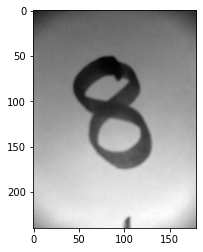

In [28]:
img_pred = cv2.imread("./test/eight.jpg", 0)

plt.imshow(img_pred, cmap='gray')
img_pred = cv2.resize(img_pred, (28,28))

# if  img_pred.shape != (28, 28):
#   img2 = cv2.resize(img_pred, (28,28))
#   imp_pred = img2.reshape(28, 28, -1)
# else:
#   img_pred = img_pred.reshape(28, 28, -1)

img_pred = img_pred.reshape(1, 28, 28, 1)
print(img_pred.shape)

In [30]:
pred = model.predict_classes(img_pred)
pred_proba = model.predict_proba(img_pred)

pred_proba = "%.2f%%" % (pred_proba[0][pred]*100)

print(pred[0], "com a probabilidade de ", pred_proba)

8 com a probabilidade de  100.00%


In [32]:
#### SAVE THE TRAINED MODEL
import pickle
pickle_out = open("model_trained_i.p", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()